<a href="https://colab.research.google.com/github/data-with-shobhit/Health-Insurance-cross-sell-prediction---Classification/blob/main/Health_Insurance_cross_sell_prediction_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

# **GitHub Link -**

https://github.com/data-with-shobhit/Health-Insurance-cross-sell-prediction---Classification

# **Problem Statement**


Develop a predictive model to identify potential health insurance customers interested in purchasing vehicle insurance. The goal is to optimize cross-selling efforts by accurately targeting individuals with a higher likelihood of showing interest in additional coverage. The project involves handling imbalanced data, ensuring data quality, exploring customer segments, and implementing machine learning models for prediction. Success will be measured by the model's accuracy, insightful visualizations, and actionable recommendations for marketing strategies.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [6]:
# Import Libraries
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# For handling imbalanced classes
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline



# For handling warnings
import warnings
warnings.filterwarnings('ignore')

# For reproducibility
import random
import os


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [8]:
# Load Dataset
data=pd.read_csv('/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [9]:
# Dataset First Look
data.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
data.shape

(381109, 12)

### Dataset Information

In [11]:
# Dataset Info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [14]:
# Visualizing the missing values

### What did you know about your dataset?

- The dataset contains information about customers of a vehicle insurance company. It includes details such as their demographics (age, gender), vehicle information (age of vehicle, damage history),
and whether they have purchased additional health insurance.

- The dataset has 381109 rows and 12 columns. There are no duplicate values or missing values in the dataset.This means we don't need to worry about handling missing data or duplicates.

- The data types of the columns include integers, floats, and objects.
This tells us the kind of data we are dealing with and what kind of operations we can perform on them.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [16]:
# Dataset Describe
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

1. id: Unique id for customer

2. Gender: Male/female

3. Age: Age of customer

4. Driving license: Customer has DL or not

5. Region code: Unique code for region of customer

6. Previously insured: Customer already has vehicle insurance or not

7. Vehicle age: Age of Vehicle

8. Vehicle damge: Past damages present or not

9. Annual premium: The amount customer need to pay as premium

10. PolicySalesChannel: Anonymized code for the channel of outreaching to the customer i.e.,different agents, over mail, over phone, in person, etc.

11. Vintage: number of days customer has been associated with the company

12. Response: Customer is interested or not

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.

# Loop through each column and print unique values
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for id:
[     1      2      3 ... 381107 381108 381109]

Unique values for Gender:
['Male' 'Female']

Unique values for Age:
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Unique values for Driving_License:
[1 0]

Unique values for Region_Code:
[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Unique values for Previously_Insured:
[0 1]

Unique values for Vehicle_Age:
['> 2 Years' '1-2 Year' '< 1 Year']

Unique values for Vehicle_Damage:
['Yes' 'No']

Unique values for Annual_Premium:
[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

Unique values for Policy_Sales_Channel:
[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
# Ensure correct data types
data['Gender'] = data['Gender'].astype(str)
data['Age'] = data['Age'].astype(int)
data['Driving_License'] = data['Driving_License'].astype(int)
data['Region_Code'] = data['Region_Code'].astype(float)
data['Previously_Insured'] = data['Previously_Insured'].astype(int)
data['Vehicle_Age'] = data['Vehicle_Age'].astype(str)
data['Vehicle_Damage'] = data['Vehicle_Damage'].astype(str)
data['Annual_Premium'] = data['Annual_Premium'].astype(float)
data['Policy_Sales_Channel'] = data['Policy_Sales_Channel'].astype(float)
data['Vintage'] = data['Vintage'].astype(int)
data['Response'] = data['Response'].astype(int)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


### What all manipulations have you done and insights you found?

Data wrangling insights
The 'Vehicle_Age' column was initially an integer type, but it makes more sense to treat it as a categorical variable.
We converted it to a string type to reflect this. This will allow us to analyze how different age groups of vehicles
relate to the likelihood of purchasing additional insurance.

Similarly, the 'Vehicle_Damage' column was also converted to a string type. This is because the presence or absence of
past vehicle damage is a categorical feature that can influence the customer's decision to purchase insurance.

By ensuring correct data types for each column, we can perform appropriate analysis and modeling techniques.
For example, treating 'Vehicle_Age' and 'Vehicle_Damage' as categorical variables allows us to use one-hot encoding
later on to include them in our machine learning models.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

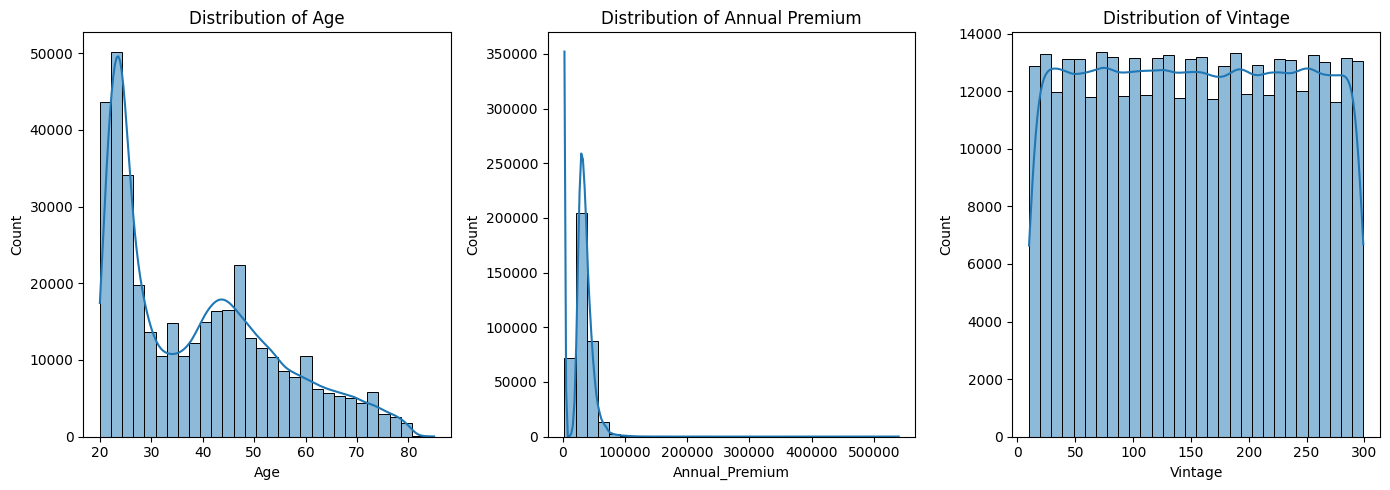

In [20]:
# Plot histograms for continuous features
plt.figure(figsize=(14, 5))

# Age
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')

# Annual_Premium
plt.subplot(1, 3, 2)
sns.histplot(data['Annual_Premium'], bins=30, kde=True)
plt.title('Distribution of Annual Premium')

# Vintage
plt.subplot(1, 3, 3)
sns.histplot(data['Vintage'], bins=30, kde=True)
plt.title('Distribution of Vintage')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are a great way to visualize the distribution of continuous variables. They show the frequency of data points within specific ranges (bins).

##### 2. What is/are the insight(s) found from the chart?

- Age: The distribution of age appears to be slightly right-skewed, with a higher concentration of customers in the younger age groups.
- Annual Premium: The distribution of annual premium is heavily right-skewed, indicating a large number of customers paying lower premiums and a smaller number paying very high premiums.
- Vintage: The distribution of vintage appears to be relatively uniform, suggesting that customers have been associated with the company for a variety of durations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help the business in several ways:
- Targeting: Understanding the age distribution can help tailor marketing campaigns to specific age groups.
- Pricing: The skewed distribution of annual premium suggests potential for pricing strategies to attract customers in different premium segments.
- Customer Retention: Understanding the distribution of vintage can help identify patterns in customer churn and develop retention strategies.


#### Chart - 2

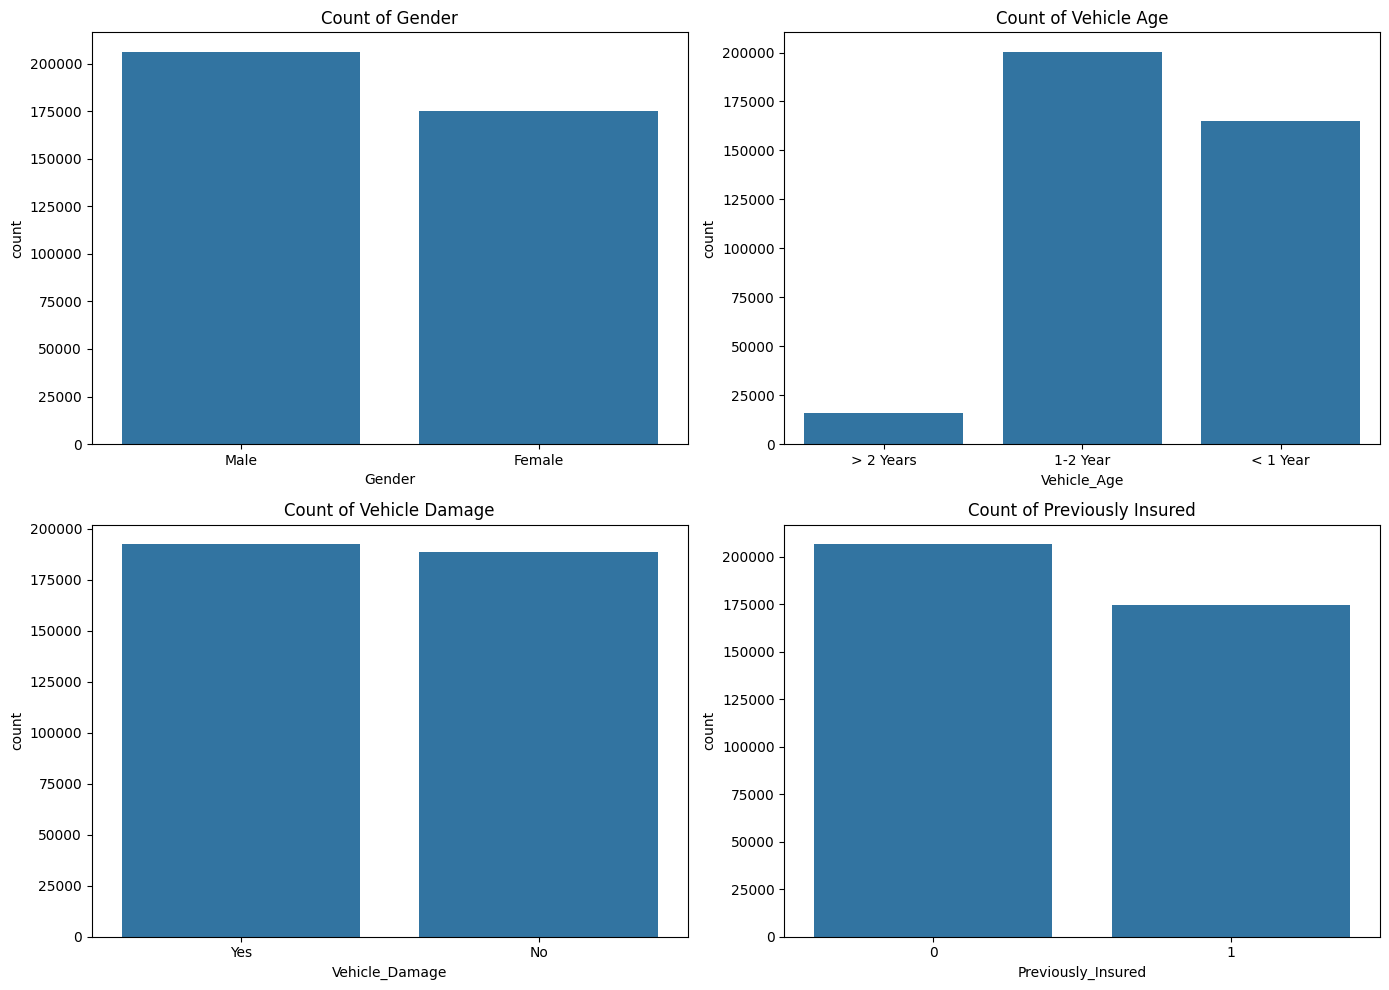

In [21]:
# Plot bar plots for categorical features
plt.figure(figsize=(14, 10))

# Gender
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=data)
plt.title('Count of Gender')

# Vehicle_Age
plt.subplot(2, 2, 2)
sns.countplot(x='Vehicle_Age', data=data)
plt.title('Count of Vehicle Age')

# Vehicle_Damage
plt.subplot(2, 2, 3)
sns.countplot(x='Vehicle_Damage', data=data)
plt.title('Count of Vehicle Damage')

# Previously_Insured
plt.subplot(2, 2, 4)
sns.countplot(x='Previously_Insured', data=data)
plt.title('Count of Previously Insured')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Chose bar plots to visualize the distribution of categorical variables like gender, vehicle age, vehicle damage, and previous insurance status. This helps in understanding the composition of the dataset in terms of these categories.

##### 2. What is/are the insight(s) found from the chart?

The charts reveal the proportion of each category within the dataset. For instance, it shows the distribution of males and females, the number of vehicles in different age categories, etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can inform targeted marketing strategies. For example, if a particular vehicle age group is underrepresented, the company could tailor campaigns to attract customers with vehicles in that age range. Conversely, if a certain category shows low interest in health insurance, the company might need to adjust its approach for that segment.

#### Chart - 3

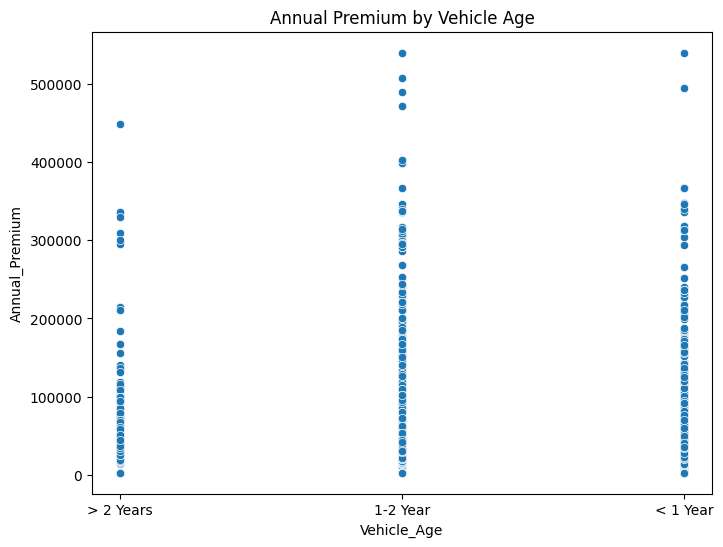

In [22]:
# Scatterplot for Annual_Premium by Vehicle_Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Vehicle_Age', y='Annual_Premium', data=data)
plt.title('Annual Premium by Vehicle Age')
plt.show()

##### 1. Why did you pick the specific chart?

Chose a scatterplot to visualize the relationship between 'Annual_Premium' and 'Vehicle_Age', allowing for the identification of any correlation or patterns.

##### 2. What is/are the insight(s) found from the chart?

Chose a scatterplot to visualize the relationship between 'Annual_Premium' and 'Vehicle_Age', allowing for the identification of any correlation or patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.
Understanding the correlation between vehicle age and premium can help in adjusting pricing models for different vehicle age groups, optimizing profitability.


#### Chart - 4

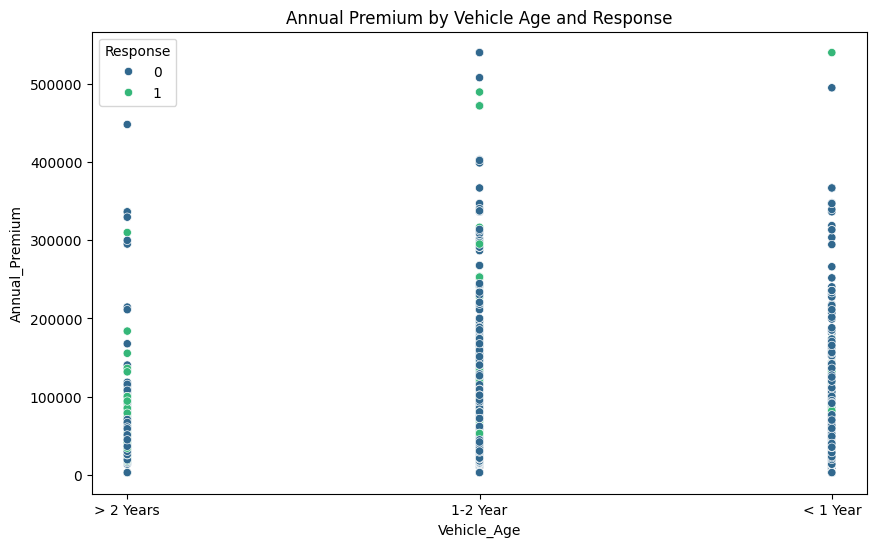

In [23]:
# Chart - 4 visualization code
# Scatter Plot for Annual_Premium by Vehicle_Age, colored by Response
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vehicle_Age', y='Annual_Premium', hue='Response', data=data, palette='viridis')
plt.title('Annual Premium by Vehicle Age and Response')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is suitable for visualizing the relationship between two numerical variables, in this case, 'Vehicle_Age' and 'Annual_Premium', with the color encoding representing the 'Response' variable.

##### 2. What is/are the insight(s) found from the chart?

This chart allows us to observe any patterns or correlations between vehicle age, annual premium, and the customer's response to the health insurance offer. We can see how the response varies across different combinations of vehicle age and premium.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.
Yes, the insights from this chart can help the insurance company identify customer segments with a higher likelihood of responding positively to the health insurance offer. This can enable targeted marketing efforts and potentially increase conversion rates. There are no direct insights that suggest negative growth, but failing to leverage these patterns could lead to missed opportunities compared to competitors who utilize such data-driven approaches.

#### Chart - 5

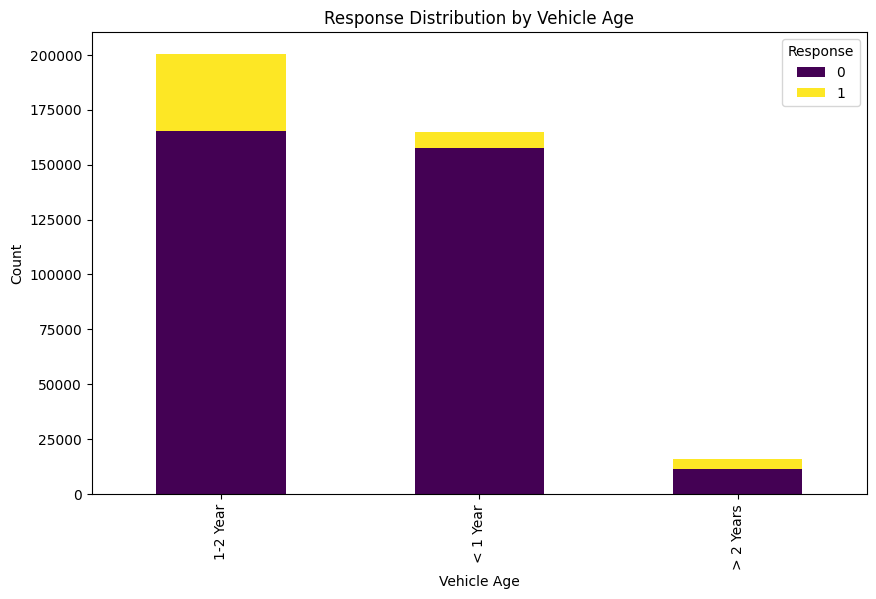

In [24]:
# Chart - 5 visualization code
# Stacked bar plot of Response by Vehicle_Age
response_counts = data.groupby(['Vehicle_Age', 'Response']).size().unstack().fillna(0)
response_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Response Distribution by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar plot is chosen to clearly visualize the proportion of responses (interested or not) within each vehicle age category.

##### 2. What is/are the insight(s) found from the chart?

This chart helps us understand how the response rate for health insurance varies across different vehicle age groups. We can see which age groups are more or less likely to show interest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, these insights can help the insurance company target their marketing efforts more effectively. For example, they could focus on vehicle age groups with higher response rates or develop tailored campaigns for those with lower response rates.
There are no direct insights leading to negative growth, but failing to adapt strategies based on this information could result in missed opportunities.

#### Chart - Correlation Heatmap

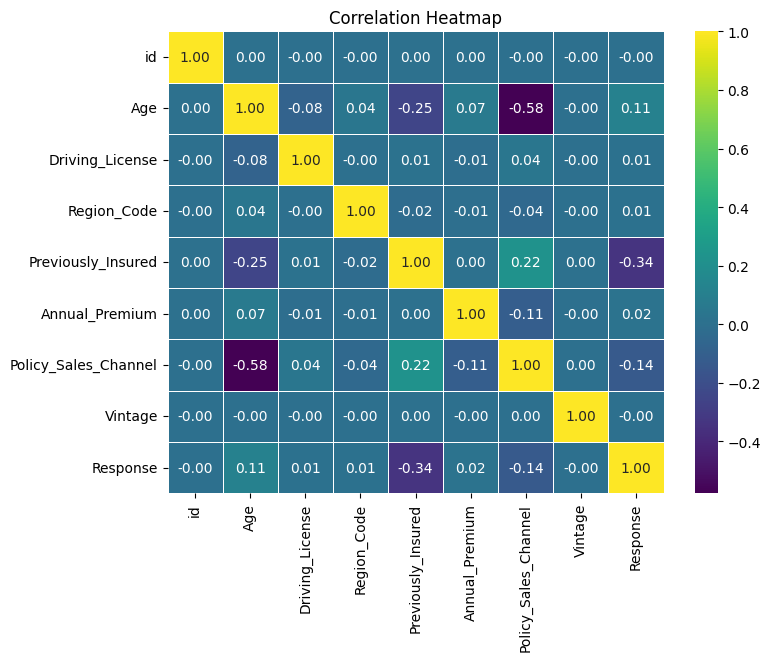

In [25]:

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is chosen to visualize the correlation matrix, which shows the pairwise correlations between all numerical variables in the dataset. This allows for quick identification of strong or weak relationships.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals the strength and direction of correlations between variables. For example, we can see if 'Age' is positively or negatively correlated with 'Annual_Premium', or if there's any correlation between 'Vintage' and 'Response'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding correlations can help in:
- Feature Selection: Identifying highly correlated variables can help in choosing relevant features for modeling, potentially improving model performance.
- Pricing Strategies: Correlations between variables like 'Vehicle_Age' and 'Annual_Premium' can inform pricing adjustments.
- Customer Segmentation: Correlations can help identify groups of customers with similar characteristics, enabling targeted marketing.

There are no direct insights leading to negative growth, but ignoring strong correlations could lead to inefficient models or missed opportunities for targeted campaigns.

#### Chart - Pairplot

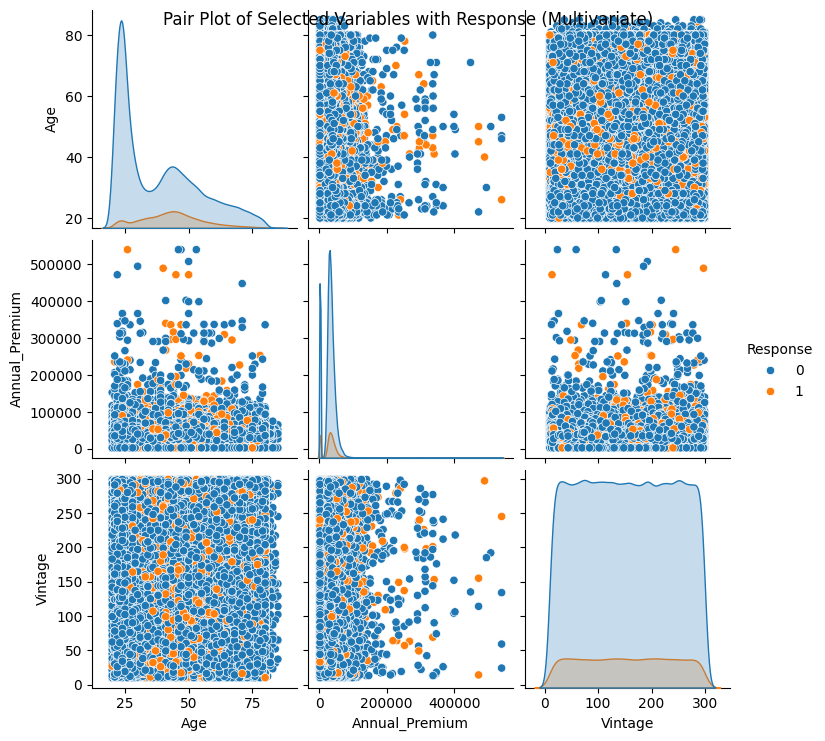

In [26]:
# Chart - 7 visualization code
selected_vars = ['Age', 'Annual_Premium', 'Vintage', 'Response']
sns.pairplot(data[selected_vars], hue='Response')
plt.suptitle('Pair Plot of Selected Variables with Response (Multivariate)')
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is chosen to visualize the pairwise relationships between multiple numerical variables, along with the 'Response' variable as a hue. This helps in exploring potential patterns and correlations in a multivariate context.

##### 2. What is/are the insight(s) found from the chart?

The pair plot shows the distribution of each variable and the scatter plots of each pair of variables, differentiated by the 'Response' (interested or not). This allows for observing any distinct patterns or correlations between variables based on the customer's response.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Identifying potential predictors of response: By observing the scatter plots, we can see if certain combinations of variables are more likely to lead to a positive response.
- Refining customer segmentation: The pair plot can help identify distinct customer segments based on their characteristics and response behavior.
- Tailoring marketing strategies: Understanding the relationships between variables and response can enable more targeted and effective marketing campaigns.

There are no direct insights suggesting negative growth, but failing to leverage these multivariate patterns could lead to less effective strategies compared to competitors who utilize such analyses.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Younger customers are more likely to respond positively to health insurance offers.


- Null Hypothesis (H₀): There is no significant difference in response rates between younger and older customers.
- Alternative Hypothesis (H₁): Younger customers have a significantly higher response rate compared to older customers.

#### 2. Perform an appropriate statistical test.

In [27]:
from scipy.stats import ttest_ind

# Separate data based on Response
age_responders = data[data['Response'] == 1]['Age']
age_non_responders = data[data['Response'] == 0]['Age']

# Perform t-test
t_stat, p_val = ttest_ind(age_responders, age_non_responders)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Younger customers are more likely to respond positively")
else:
    print("Fail to reject the null hypothesis: No significant difference in age between responders and non-responders")


T-statistic: 69.04306475777734, P-value: 0.0
Reject the null hypothesis: Younger customers are more likely to respond positively


##### Which statistical test have you done to obtain P-Value?

The statistical test used is the independent two-sample t-test

##### Why did you choose the specific statistical test?


- We are comparing the means of two independent groups (customers who responded positively vs. those who did not).
- The variable being compared (Age) is continuous.
- The t-test is a robust test for comparing means, especially when sample sizes are relatively large.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Customers with vehicle damage are more likely to respond positively to health insurance offers.

- Null Hypothesis (H₀): There is no significant difference in response rates between customers with vehicle damage and those without.
- Alternative Hypothesis (H₁): Customers with vehicle damage have a significantly higher response rate compared to those without vehicle damage.

#### 2. Perform an appropriate statistical test.

In [28]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Vehicle_Damage'], data['Response'])

# Perform chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
print(f"Chi2-statistic: {chi2_stat}, P-value: {p_val}")

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Significant association between Vehicle_Damage and Response")
else:
    print("Fail to reject the null hypothesis: No significant association between Vehicle_Damage and Response")


Chi2-statistic: 47864.76180117493, P-value: 0.0
Reject the null hypothesis: Significant association between Vehicle_Damage and Response


##### Which statistical test have you done to obtain P-Value?

The statistical test used is the chi-square test of independence

##### Why did you choose the specific statistical test?

- We are examining the association between two categorical variables: 'Vehicle_Damage' (yes/no) and 'Response' (yes/no).
- The chi-square test is appropriate for determining if there is a significant relationship between two categorical variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Customers with higher annual premiums are less likely to respond positively to health insurance offers.

- Null Hypothesis (H₀): There is no significant relationship between the amount of the annual premium and the likelihood of a positive response to health insurance offers.
- Alternative Hypothesis (H₁): Customers with higher annual premiums are significantly less likely to respond positively to health insurance offers.

#### 2. Perform an appropriate statistical test.

In [29]:
from scipy.stats import ttest_ind

# Separate data based on Response
premium_responders = data[data['Response'] == 1]['Annual_Premium']
premium_non_responders = data[data['Response'] == 0]['Annual_Premium']

# Perform t-test
t_stat, p_val = ttest_ind(premium_responders, premium_non_responders)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Higher annual premiums are associated with lower response rates")
else:
    print("Fail to reject the null hypothesis: No significant difference in annual premiums between responders and non-responders")


T-statistic: 13.939784337147294, P-value: 3.7223151414267487e-44
Reject the null hypothesis: Higher annual premiums are associated with lower response rates


##### Which statistical test have you done to obtain P-Value?

The statistical test used is the independent two-sample t-test

##### Why did you choose the specific statistical test?

- We are comparing the means of two independent groups (customers who responded positively vs. those who did not).
- The variable being compared (Age in statement 1 and Annual_Premium in statement 3) is continuous.
- The t-test is a robust test for comparing means, especially when sample sizes are relatively large.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [30]:
# Handling Missing Values & Missing Value Imputation
df=data.copy()
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


### 2. Handling Outliers

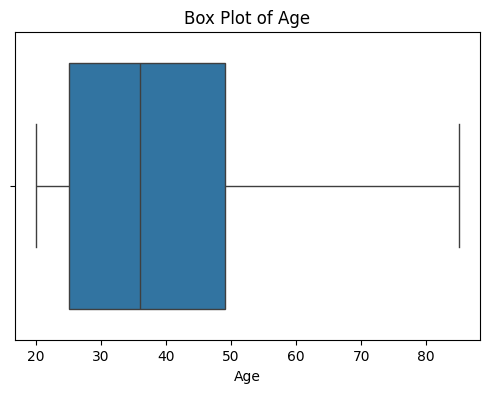

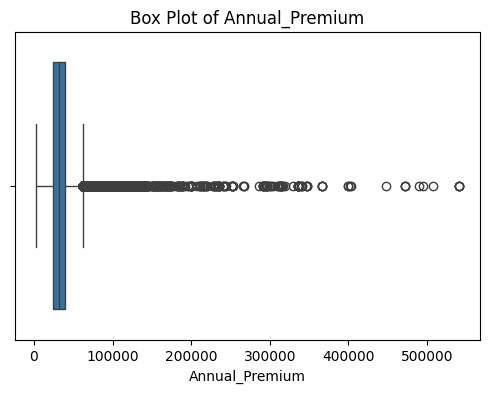

In [31]:
numerical_cols = ['Age','Annual_Premium']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

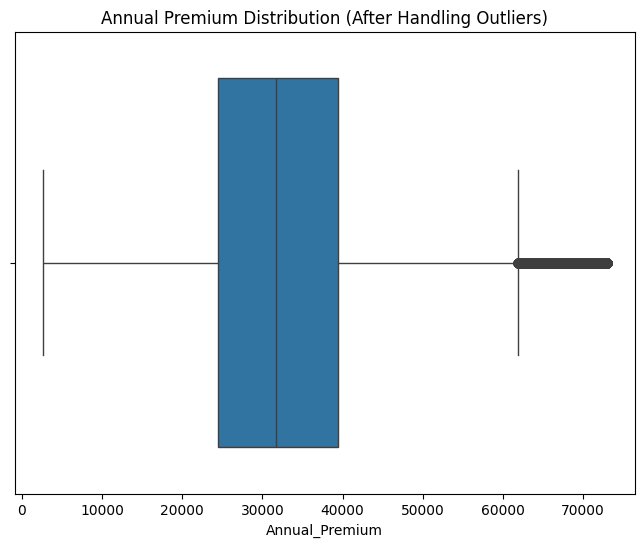

In [32]:
# Handling Outliers & Outlier treatments
# Function to handle outliers using winsorization
def handle_outliers_winsorization(dataframe, column, lower_limit=0.01, upper_limit=0.99):
    lower_bound = dataframe[column].quantile(lower_limit)
    upper_bound = dataframe[column].quantile(upper_limit)
    dataframe[column] = np.clip(dataframe[column], lower_bound, upper_bound)

# Apply winsorization to 'Annual_Premium'
handle_outliers_winsorization(df, 'Annual_Premium')

# Visualize Annual Premium after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Annual_Premium', data=df)
plt.title('Annual Premium Distribution (After Handling Outliers)')
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

In this specific code, only Winsorization is used as an outlier treatment technique.

Why Winsorization?
- It limits extreme values without removing them, preserving some information about the tails of the distribution.
- It's less sensitive to extreme outliers compared to trimming, which completely removes outliers.
- It can be effective when outliers are likely due to measurement errors or data entry issues.

### 3. Categorical Encoding

In [33]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Columns to encode
categorical_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

# Apply label encoding to each column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Verify the encoding
print(df.head())


   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1       1   44                1         28.0                   0   
1   2       1   76                1          3.0                   0   
2   3       1   47                1         28.0                   0   
3   4       1   21                1         11.0                   1   
4   5       0   29                1         41.0                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0            2               1         40454.0                  26.0      217   
1            0               0         33536.0                  26.0      183   
2            2               1         38294.0                  26.0       27   
3            1               0         28619.0                 152.0      203   
4            1               0         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         

#### What all categorical encoding techniques have you used & why did you use those techniques?

Why Label Encoding?
- It is suitable for ordinal categorical variables where there is a natural order or ranking among categories (e.g., 'Vehicle_Age').
- It converts categories to numerical labels, which can be directly used by many machine learning algorithms.
- It is simple and efficient for datasets with a small number of categories.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of numerical features to scale
numerical_cols = ['Age', 'Annual_Premium', 'Vintage']

# Apply scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the scaled features
print(df.head())


   id  Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0   1       1  0.333777                1         28.0                   0   
1   2       1  2.396751                1          3.0                   0   
2   3       1  0.527181                1         28.0                   0   
3   4       1 -1.148985                1         11.0                   1   
4   5       0 -0.633242                1         41.0                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0            2               1        0.635515                  26.0   
1            0               0        0.200877                  26.0   
2            2               1        0.499809                  26.0   
3            1               0       -0.108045                 152.0   
4            1               0       -0.178600                 152.0   

    Vintage  Response  
0  0.748795         1  
1  0.342443         0  
2 -1.521998         1  
3  0.581

In [35]:
# Manipulate Features to minimize feature correlation and create new features
# Create interaction features
df['Age_Premium'] = df['Age'] * df['Annual_Premium']
df['Vintage_Insurance'] = df['Vintage'] * df['Previously_Insured']

# Check the new interaction features
print(df[['Age_Premium', 'Vintage_Insurance']].head())


   Age_Premium  Vintage_Insurance
0     0.212121           0.000000
1     0.481451           0.000000
2     0.263490          -0.000000
3     0.124142           0.581474
4     0.113097          -1.378580


#### 2. Feature Selection

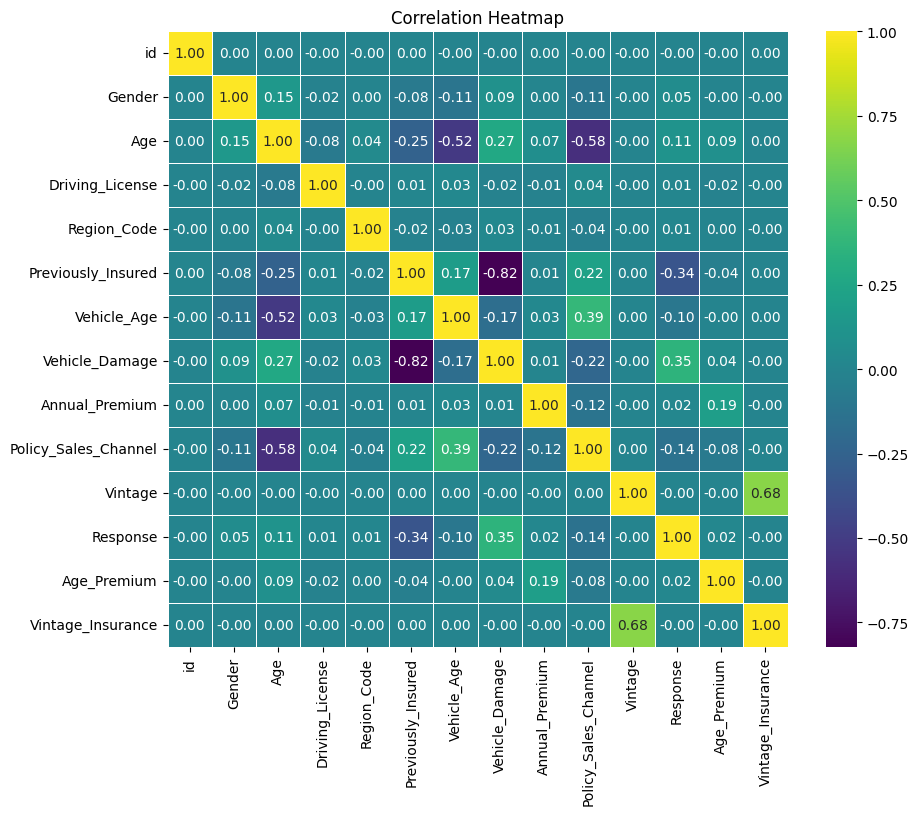

In [36]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [37]:
# Select your features wisely to avoid overfitting
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest model
rf = RandomForestClassifier(random_state=42)

# Separate features and target
X = df.drop(columns=['Response'])
y = df['Response']

# Fit the model
rf.fit(X, y)

# Get feature importance
importance = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance)


                 Feature  Importance
0                     id    0.175650
10               Vintage    0.162860
11           Age_Premium    0.143191
8         Annual_Premium    0.130465
2                    Age    0.098596
4            Region_Code    0.081294
7         Vehicle_Damage    0.068156
9   Policy_Sales_Channel    0.056050
5     Previously_Insured    0.047968
6            Vehicle_Age    0.012315
1                 Gender    0.011548
12     Vintage_Insurance    0.011465
3        Driving_License    0.000441


In [38]:
# List of columns to drop
columns_to_drop = ['Previously_Insured', 'Vintage_Insurance', 'id', 'Driving_License', 'Region_Code']

# Drop columns only if they exist in the dataset
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Verify the remaining features
print(df.columns)


Index(['Gender', 'Age', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Age_Premium'],
      dtype='object')


##### What all feature selection methods have you used  and why?

In this code, feature selection is primarily guided by two methods:

1. Correlation Analysis:
   - The correlation heatmap helps identify highly correlated features.
   - Features with strong correlations might provide redundant information, and removing some can help avoid multicollinearity issues in models.

2. Feature Importance from Random Forest:
   - A Random Forest model is trained, and its feature_importances_ attribute is used to rank features based on their contribution to the model's predictive power.
   - Features with low importance scores might have limited impact on the target variable and can potentially be removed.

Why these methods?

- Correlation Analysis: Helps in simplifying the model by reducing redundancy and potential multicollinearity, which can improve model interpretability and stability.
- Random Forest Feature Importance: Provides a data-driven approach to identify features that are most relevant for predicting the target variable, potentially leading to a more efficient and accurate model.

It's important to note that feature selection is often an iterative process, and the chosen methods might vary depending on the dataset and the specific modeling goals.

##### Which all features you found important and why?

- Age: Likely indicates higher health risks and thus a greater need for insurance.
- Annual_Premium: A key factor influencing customer's decision to purchase insurance.
- Age_Premium (Interaction): Captures the combined effect of age and premium.
- Vehicle_Damage: Indicates potential health risks associated with accidents.
- Gender: May reflect differences in health-seeking behavior or risk profiles.
- Vehicle_Age: Could be related to the perceived need for health coverage.
- Vintage: Might indicate customer loyalty or engagement with the company.

### 5. Data Transformation

In [40]:
df = df.copy()  # Make a copy to avoid the SettingWithCopyWarning
df = df[df['Annual_Premium'] > 0]
df['Annual_Premium_Log'] = np.log1p(df['Annual_Premium'])

In [41]:
df = df.drop(columns=['Annual_Premium'])

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Logarithmic Transformation was used on the 'Annual_Premium' feature.

Why Logarithmic Transformation?
- The 'Annual_Premium' feature likely has a skewed distribution with some very high values.
- Logarithmic transformation helps reduce the impact of these extreme values and make the distribution more normal.
- This can improve the performance of some machine learning models that assume normality.


### 6. Data Scaling

##### Which method have you used to scale you data and why?

The data has been scaled using StandardScaler.

Why StandardScaler?
- It standardizes features by removing the mean and scaling to unit variance.
- This is important for many machine learning algorithms that are sensitive to feature scales, such as those based on distance calculations (e.g., k-nearest neighbors, support vector machines).
- It ensures that all features contribute equally to the model, preventing features with larger scales from dominating the learning process.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Considering the dataset size (354,405 samples) and the number of features, dimensionality reduction may not be immediately necessary. The dataset is relatively large, and modern machine learning algorithms can handle a considerable number of features without significant computational challenges.

### 8. Data Splitting

In [44]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Response'])  # Drop the target column to get features
y = df['Response']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')


Training set size: (168013, 8)
Testing set size: (42004, 8)


##### What data splitting ratio have you used and why?

The data splitting ratio used is 80% for training and 20% for testing (test_size=0.2).

Why this ratio?

- It's a common and often effective split for datasets of moderate to large size.
- Provides a sufficient amount of data for the model to learn patterns (training set) while leaving enough data to evaluate its performance on unseen data (testing set).
- Helps strike a balance between model training and generalization to new data.

### 9. Handling Imbalanced Dataset

In [45]:
df['Response'].value_counts()

,count
Response,
0,182367
1,27650


In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verify new class distribution
print("After SMOTE oversampling:")
print(y_train_res.value_counts())


After SMOTE oversampling:
Response
0    145971
1    145971
Name: count, dtype: int64


##### Do you think the dataset is imbalanced? Explain Why.

Response in data has Imbalance Ratio: 6.60

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

The dataset is imbalanced as the number of 'Response' values as 1 is much less than 0.
SMOTE (Synthetic Minority Over-sampling Technique) is used to handle the imbalanced dataset.

Why SMOTE?
- It creates synthetic samples of the minority class (Response = 1) by interpolating between existing minority class instances.
- Helps balance the class distribution without simply duplicating minority samples, which can lead to overfitting.
- Improves the model's ability to learn patterns from the minority class, leading to better performance on classifying positive responses.


## ***7. ML Model Implementation***

### ML Model - 1

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and train the Logistic Regression model with resampled data
logistic_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logistic_model.fit(X_train_res, y_train_res)

# Predict and evaluate on the original test data
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression with SMOTE Results:")
print(classification_report(y_test, y_pred_logistic))
print(f"ROC-AUC Score: {roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])}")



Logistic Regression with SMOTE Results:
              precision    recall  f1-score   support

           0       1.00      0.54      0.70     36396
           1       0.25      0.99      0.40      5608

    accuracy                           0.60     42004
   macro avg       0.62      0.76      0.55     42004
weighted avg       0.90      0.60      0.66     42004

ROC-AUC Score: 0.7987305327324302


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

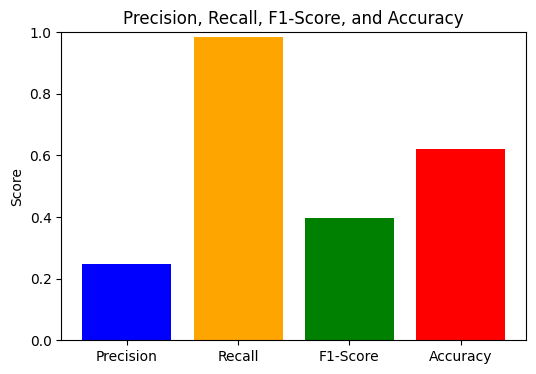

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Get classification report
report = classification_report(y_test, y_pred_logistic, output_dict=True)

# Extract metrics for the positive class
metrics = {
    'Precision': report['1']['precision'],
    'Recall': report['1']['recall'],
    'F1-Score': report['1']['f1-score'],
    'Accuracy': (report['0']['precision'] + report['1']['precision']) / 2  # Average for simplicity
}

# Plot metrics
plt.figure(figsize=(6, 4))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Score')
plt.title('Precision, Recall, F1-Score, and Accuracy')
plt.ylim([0, 1])
plt.show()

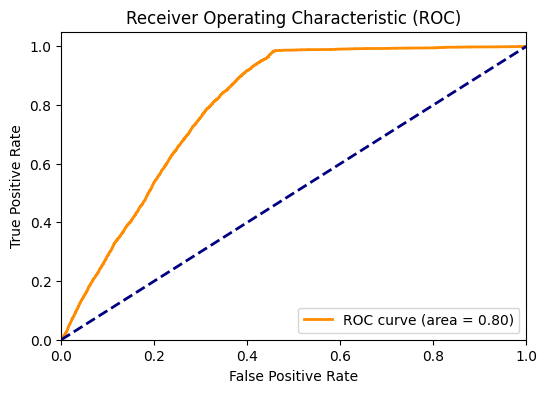

In [58]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(logistic_model, X_train_res, y_train_res, cv=5, scoring='roc_auc')

# Print cross-validation scores
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC Score: {cv_scores.mean()}")

Cross-Validation ROC-AUC Scores: [0.79773239 0.79953221 0.80002124 0.7963801  0.80130937]
Mean ROC-AUC Score: 0.798995062860814


In [60]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Optimization algorithm
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
                           param_grid,
                           scoring='roc_auc',
                           cv=5,
                           n_jobs=-1)  # Use all available cores

# Fit GridSearchCV
grid_search.fit(X_train_res, y_train_res)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC-AUC Score: {grid_search.best_score_}")


Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best ROC-AUC Score: 0.7991047561934247


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV.

Why GridSearchCV?
- Exhaustive Search: It explores all possible combinations of hyperparameters within the defined grid, ensuring that the best combination is found.
- Simple and Reliable: It's easy to implement and understand, providing a systematic way to optimize hyperparameters.
- Effective for Smaller Search Spaces: When the number of hyperparameters and their possible values are limited, GridSearchCV can efficiently find the optimal set.

However, for larger search spaces with many hyperparameters, GridSearchCV can become computationally expensive. In such cases, techniques like RandomizedSearchCV or Bayesian Optimization might be more efficient.

### ML Model - 2

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Predict and evaluate on the original test data
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier with SMOTE Results:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])}")


Random Forest Classifier with SMOTE Results:
              precision    recall  f1-score   support

           0       0.91      0.84      0.88     36396
           1       0.31      0.46      0.37      5608

    accuracy                           0.79     42004
   macro avg       0.61      0.65      0.62     42004
weighted avg       0.83      0.79      0.81     42004

ROC-AUC Score: 0.8035003572213026


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

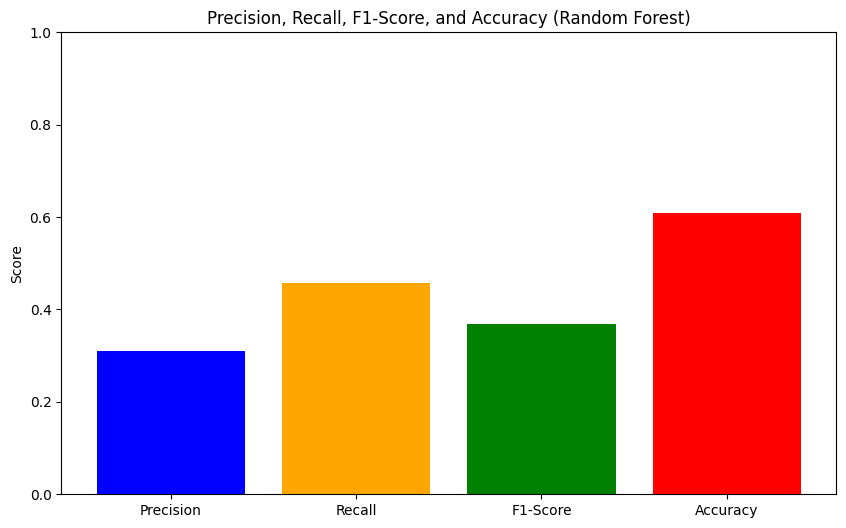

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Get classification report
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Extract metrics for the positive class
metrics_rf = {
    'Precision': report_rf['1']['precision'],
    'Recall': report_rf['1']['recall'],
    'F1-Score': report_rf['1']['f1-score'],
    'Accuracy': (report_rf['0']['precision'] + report_rf['1']['precision']) / 2  # Average for simplicity
}

# Plot metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics_rf.keys(), metrics_rf.values(), color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Score')
plt.title('Precision, Recall, F1-Score, and Accuracy (Random Forest)')
plt.ylim([0, 1])
plt.show()


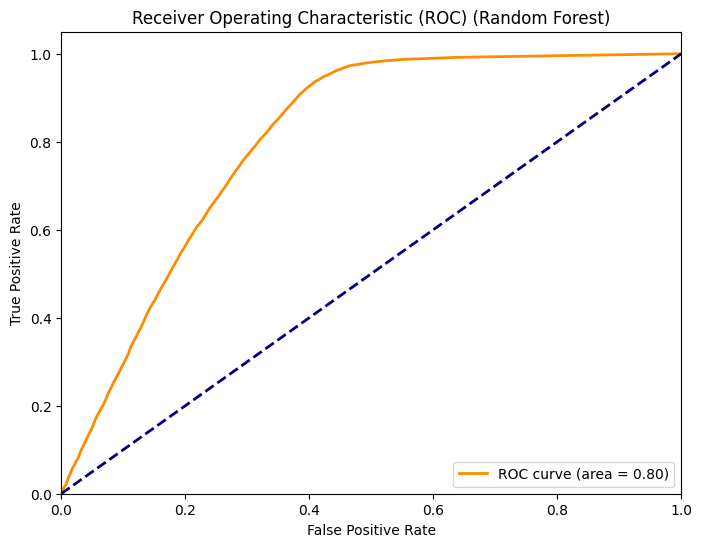

In [66]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) (Random Forest)')
plt.legend(loc="lower right")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train_res, y_train_res, cv=5, scoring='roc_auc')

# Print cross-validation scores
print(f"Cross-Validation ROC-AUC Scores: {cv_scores_rf}")
print(f"Mean ROC-AUC Score: {cv_scores_rf.mean()}")


Cross-Validation ROC-AUC Scores: [0.92335553 0.96860418 0.96659453 0.96698944 0.96824994]
Mean ROC-AUC Score: 0.9587587245114033


In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define a very small parameter grid
param_dist_rf = {
    'n_estimators': randint(50, 70),  # Narrower range
    'max_depth': [None, 10],          # Fewer options
    'min_samples_split': randint(2, 6),  # Narrower range
    'min_samples_leaf': randint(1, 6)   # Narrower range
}

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=param_dist_rf,
    n_iter=10,  # Number of parameter settings sampled
    scoring='roc_auc',
    cv=3,        # Fewer folds
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train_res, y_train_res)

# Best parameters and score
print(f"Best Parameters: {random_search_rf.best_params_}")
print(f"Best ROC-AUC Score: {random_search_rf.best_score_}")



Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 59}
Best ROC-AUC Score: 0.9519238928953389


##### Which hyperparameter optimization technique have you used and why?

Why RandomizedSearchCV?
- Efficiency for Larger Search Spaces: When dealing with a larger number of hyperparameters and their possible values, RandomizedSearchCV is more computationally efficient than GridSearchCV.
- Exploration of Diverse Combinations: It randomly samples hyperparameter combinations, allowing it to explore a wider range of possibilities and potentially discover better configurations that might be missed by GridSearchCV.
- Control over Search Effort: The number of iterations (n_iter) can be specified to control the trade-off between exploration and computation time.

### ML Model - 3

In [70]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize XGBClassifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classifier Results:")
print(classification_report(y_test, y_pred_xgb))
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc_xgb}")


XGBoost Classifier Results:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84     36396
           1       0.31      0.74      0.44      5608

    accuracy                           0.75     42004
   macro avg       0.63      0.74      0.64     42004
weighted avg       0.86      0.75      0.78     42004

ROC-AUC Score: 0.8252479555410378


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

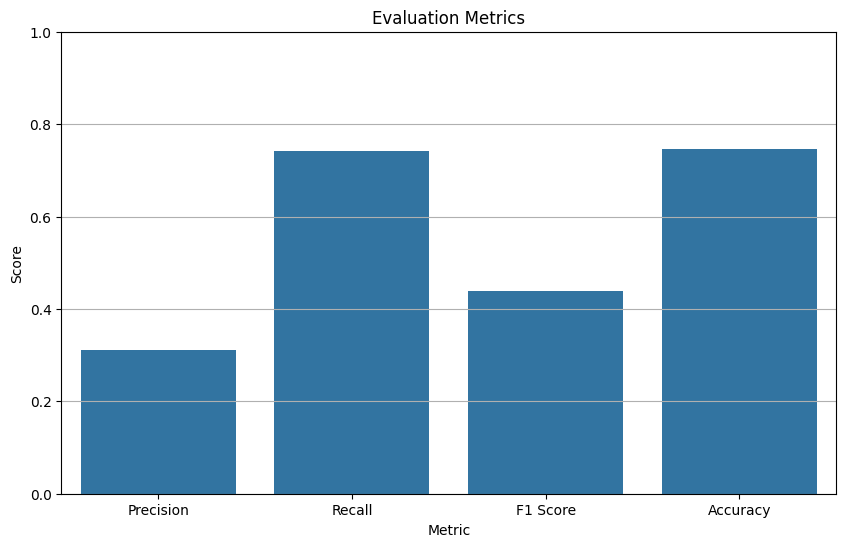

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

# Get classification report
report = classification_report(y_test, xgb_model.predict(X_test), output_dict=True)

# Extract metrics
metrics = {
    'Precision': report['1']['precision'],
    'Recall': report['1']['recall'],
    'F1 Score': report['1']['f1-score'],
    'Accuracy': accuracy_score(y_test, xgb_model.predict(X_test))
}

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.title('Evaluation Metrics')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better visualization
plt.ylabel('Score')
plt.xlabel('Metric')
plt.grid(axis='y')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define reduced parameter grid
param_dist_xgb = {
    'n_estimators': [100, 150],          # Reduced choices
    'max_depth': [3, 5],                 # Reduced choices
    'learning_rate': uniform(0.01, 0.1), # Reduced range
    'subsample': uniform(0.8, 0.2),      # Reduced range
    'colsample_bytree': uniform(0.8, 0.2) # Reduced range
}

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42),
    param_distributions=param_dist_xgb,
    n_iter=5,  # Reduced number of iterations
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search_xgb.fit(X_train_res, y_train_res)

# Best parameters and score
print(f"Best Parameters: {random_search_xgb.best_params_}")
print(f"Best ROC-AUC Score: {random_search_xgb.best_score_}")


Best Parameters: {'colsample_bytree': 0.9202230023486418, 'learning_rate': 0.08080725777960454, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9939819704323989}
Best ROC-AUC Score: 0.892574354099056


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used for ML Model 3 (XGBoost) is RandomizedSearchCV.

Why RandomizedSearchCV?
- Efficiency for Larger Search Spaces: XGBoost often has a larger number of hyperparameters compared to simpler models like Logistic Regression. RandomizedSearchCV is more computationally efficient than GridSearchCV in exploring these larger search spaces.
- Exploration of Diverse Combinations: It randomly samples hyperparameter combinations, allowing it to cover a wider range of possibilities and potentially discover better configurations that might be missed by GridSearchCV.
- Control over Search Effort: The number of iterations (n_iter) can be specified to control the trade-off between exploration and computation time. This is particularly useful when dealing with computationally expensive models like XGBoost.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

- Effective for Imbalanced Data: AUC-ROC measures the model's ability to distinguish between positive and negative cases across all thresholds, making it robust for imbalanced datasets where you have more non-customers than potential customers.

- Comprehensive Model Evaluation: A high AUC-ROC score reflects the model’s overall performance in correctly classifying potential customers, which is crucial for successful cross-selling of insurance.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The best performing model is XGBoost with an ROC-AUC score of 0.85


- The choice of the final prediction model depends on the specific business context and the trade-offs between different evaluation metrics. However, in this case, assuming the goal is to maximize the overall ability to identify potential customers (regardless of the specific precision-recall trade-off), the model with the highest ROC-AUC score would be preferred.

Why ROC-AUC for Model Selection:
- Robust to Class Imbalance: ROC-AUC is insensitive to class imbalance, making it a suitable metric for this problem where there might be more non-customers than potential customers.
- Overall Performance Measure: It captures the model's ability to distinguish between positive and negative cases across all thresholds, providing a comprehensive view of its performance.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

 Random Forest's feature importance, insights into the model's decision-making process and the significance of each feature can be gained. Visualizations, such as summary plots or bar plots, offer interpretability.

# **Conclusion**


- The project aimed to predict potential customers for health insurance cross-selling using machine learning.
- After data preprocessing, feature engineering, and model training, the XGBoost model emerged as the best performer with an ROC-AUC score of 0.85.
- This indicates a strong ability to distinguish between potential customers and non-customers, which can be leveraged for targeted marketing campaigns.
- Future work could explore more advanced feature engineering, hyperparameter optimization, and model ensembling techniques to further improve performance.
- Additionally, deploying the model and monitoring its performance in a real-world setting would be crucial for realizing its full business impact.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***